# Setting up the enviroment

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


# The problem

The machine learning is to predict the house price, but before that it is important to study the dataset and its features



In [ ]:
# read a comma separated file (csv) using pandas
housing = pd.read_csv('train_set.csv',index_col=0) 

In [ ]:
# print the dataset size
print("There is", housing.shape[0], "samples")
print("Each sample has", housing.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [ ]:
# print the top elements from the dataset
housing.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
5,Coburg,4/34 Gladstone St,2,u,650000.0,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,136.0,81.0,1975.0,Moreland,-37.74490,144.97540,Northern Metropolitan,11204.0
6,Glen Iris,27 Pascoe St,3,h,1510000.0,PI,hockingstuart,10/09/2016,9.2,3146.0,3.0,2.0,2.0,370.0,NaN,NaN,Boroondara,-37.85970,145.08830,Southern Metropolitan,10412.0
7,Pascoe Vale,5/10 Dorset Rd,3,u,600000.0,S,Nelson,4/03/2017,9.9,3044.0,3.0,1.0,1.0,204.0,124.0,2008.0,Moreland,-37.72340,144.94970,Northern Metropolitan,7485.0
8,Preston,23 Dean St,4,h,1260000.0,SP,Nelson,14/05/2016,8.8,3072.0,4.0,3.0,2.0,654.0,150.0,1950.0,Darebin,-37.73650,145.01730,Northern Metropolitan,14577.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [ ]:
# we can see the type of each features as follows
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.
len(set(housing.Address))

5400

In [ ]:
# print those categorical features
housing.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [ ]:
# We can check how many different type there is in the dataset using the folliwing line
housing["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

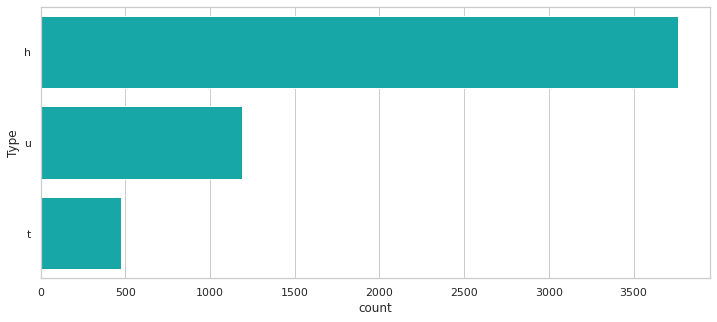

In [ ]:
sns.countplot(y="Type", data=housing, color="c")
plt.show()

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

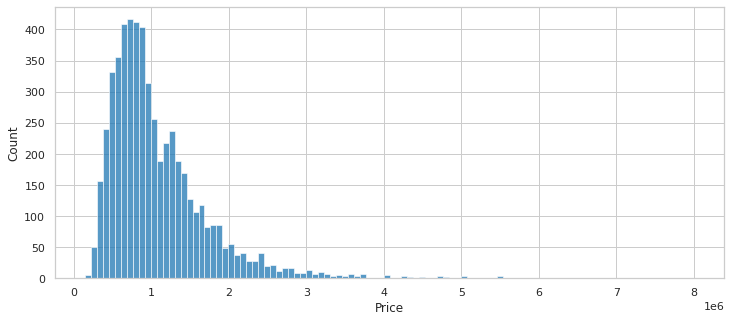

In [ ]:
sns.histplot(housing["Price"])
plt.show()

In [ ]:
# with the describe method we otain some statistics of all numerical features
housing.describe()
# There is 13 numerical features

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**What do you observe here?**
Any question?

What happens with **YearBuilt**?

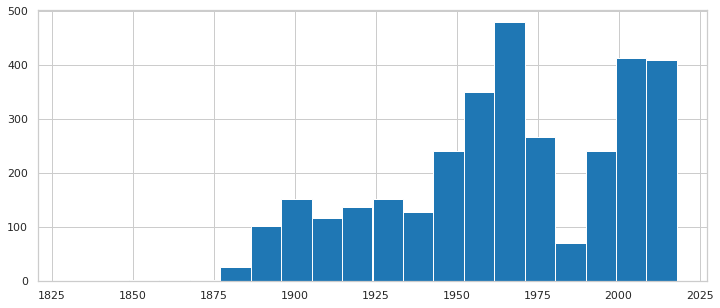

In [ ]:
plt.hist(housing.YearBuilt,bins= 20)
plt.show()

What happens with **BuildingArea**?

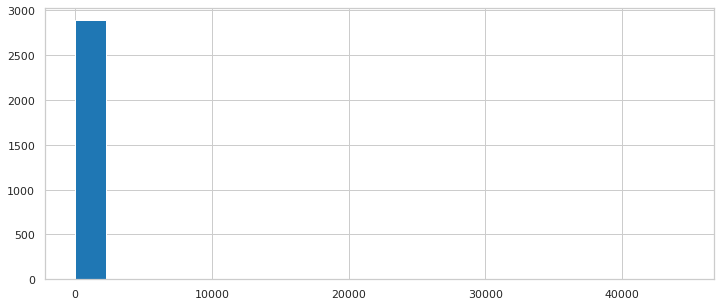

In [ ]:
plt.hist(housing.BuildingArea,bins= 20)
plt.show()

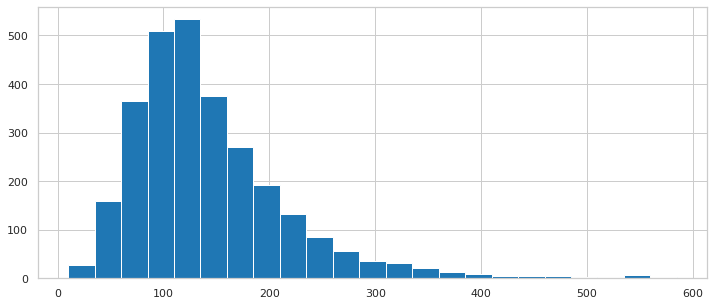

In [ ]:
plt.hist(housing.BuildingArea,bins= range(10,600,25))
plt.show()

What happens with Postal Code?

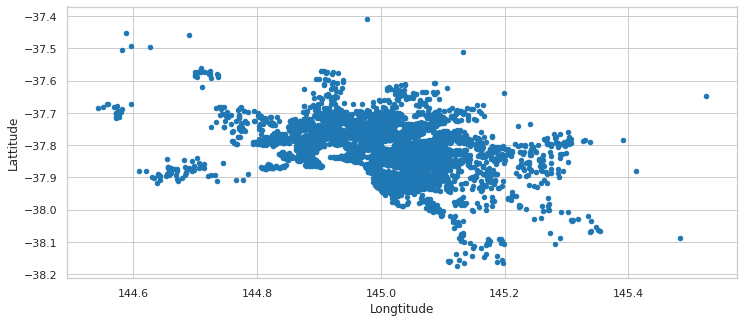

In [ ]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude")
plt.show()

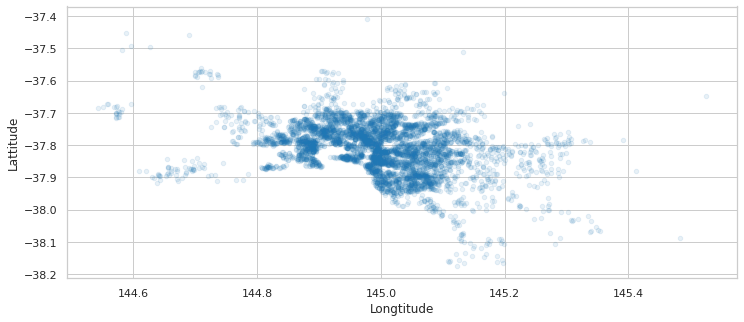

In [ ]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.1)
plt.show()

No handles with labels found to put in legend.


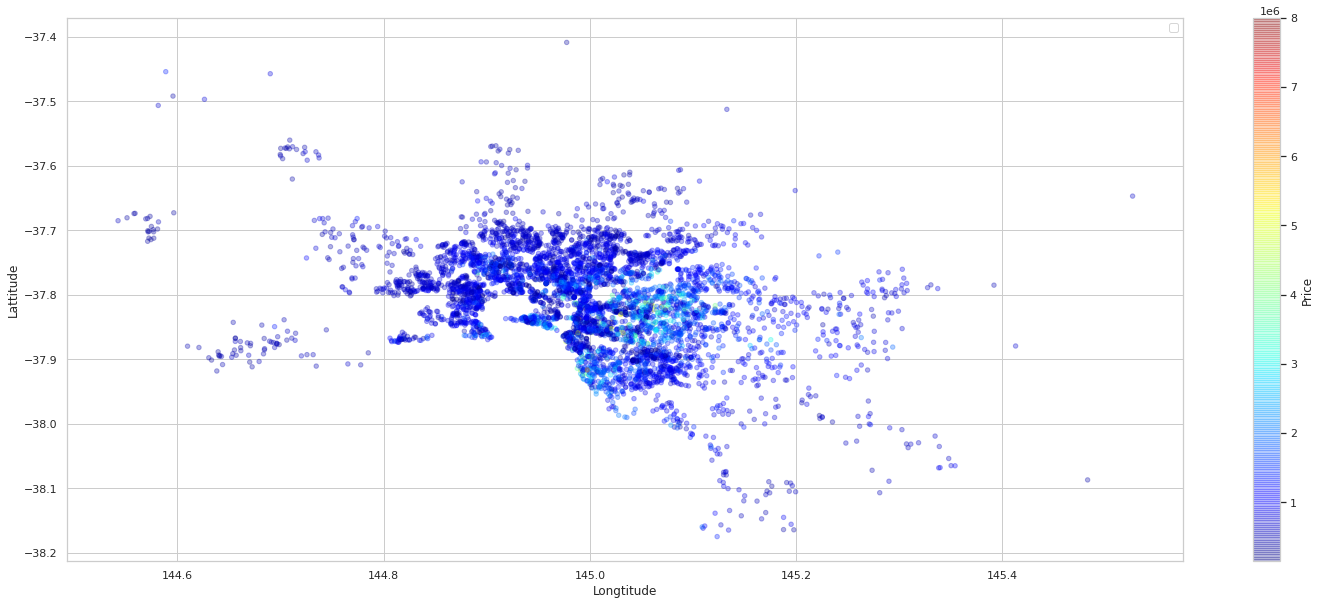

In [ ]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

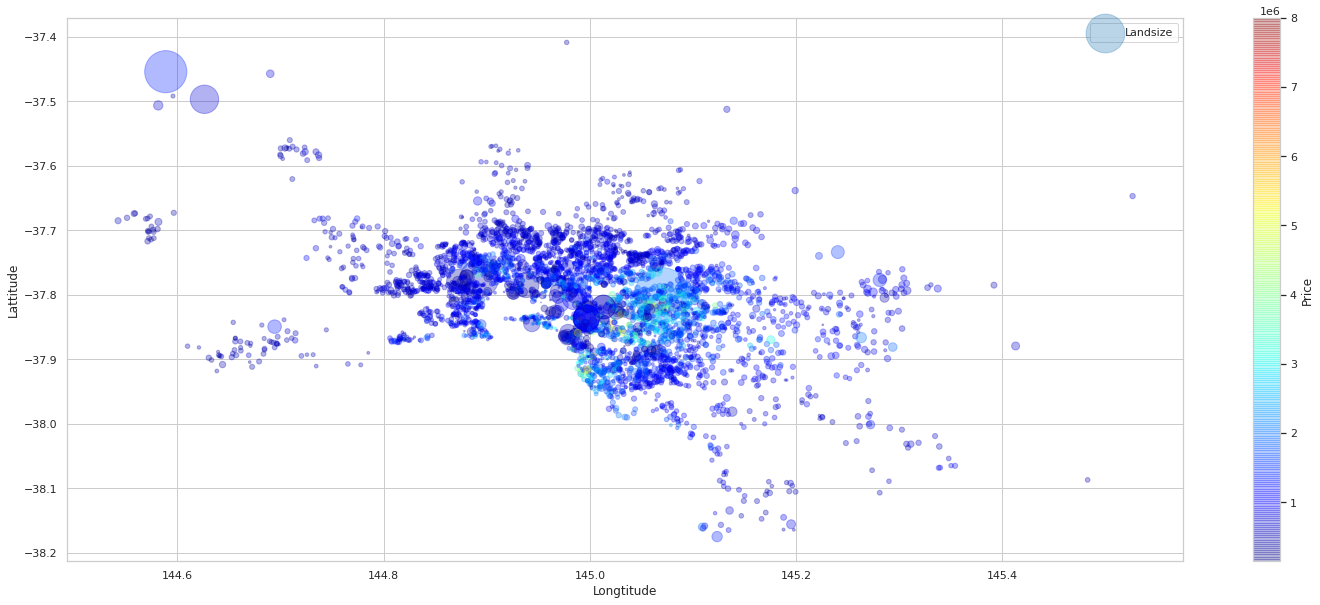

In [ ]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=housing["Landsize"]/25, label="Landsize", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

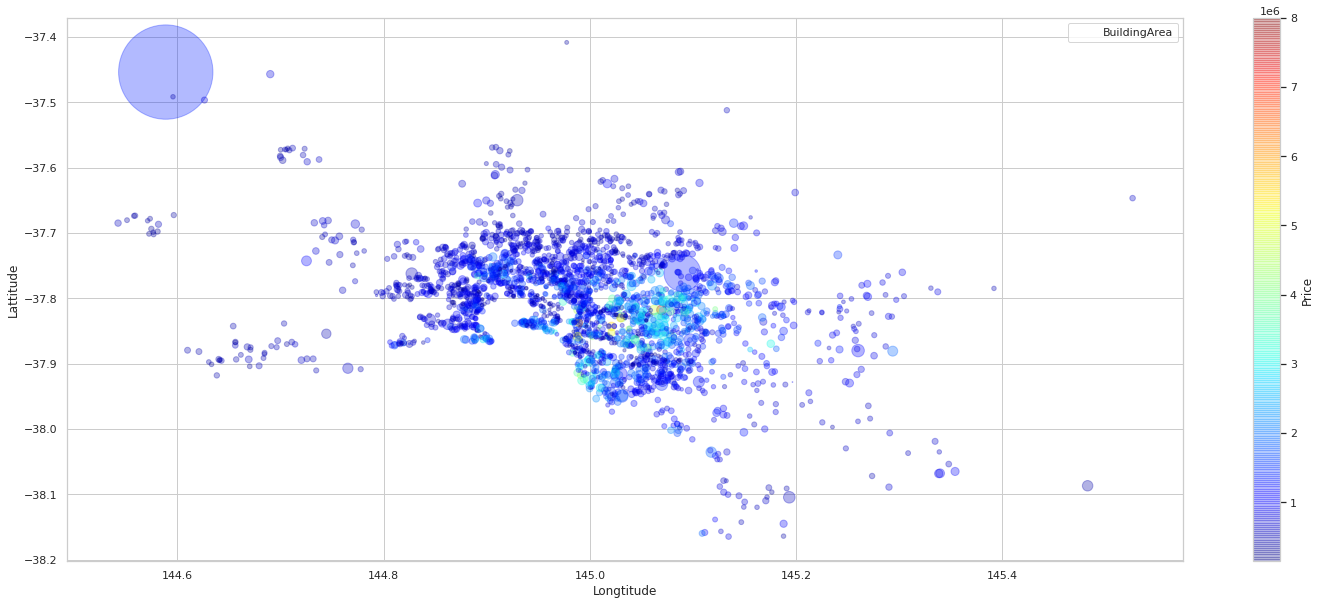

In [ ]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=housing["BuildingArea"]/5, label="BuildingArea", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# The model

## model v1: BASELINE

* We will create a simple model which uses the Landsize to predict the PriceHouse
* We will use a the Simple Linear Regression 
* We divide training set into train and validation

In [ ]:
def show_results(y,y_train_pred,y_val,y_val_pred):
  ## Evaluate the model and plot it
  print("----- EVALUATION ON TRAIN SET ------")
  print("RMSE",np.sqrt(mean_squared_error(y, y_train_pred)))
  print("R^2: ",r2_score(y, y_train_pred))

  print("----- EVALUATION ON VALIDATION SET ------")
  print("RMSE",np.sqrt(mean_squared_error(y_val, y_val_pred)))
  print("R^2: ",r2_score(y_val, y_val_pred))


  plt.scatter(y, y_train_pred,alpha = 0.6)
  plt.scatter(y_val, y_val_pred,c='r',alpha = 0.6)
  plt.xlabel('Price')
  plt.ylabel('Predicted price');
  plt.show()


----- EVALUATION ON TRAIN SET ------
RMSE 556544.9565215105
R^2:  0.2508661565044621
----- EVALUATION ON VALIDATION SET ------
RMSE 583700.8318769819
R^2:  0.22407660584241562


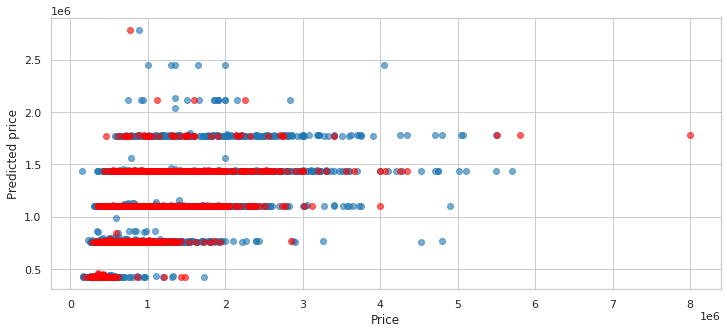

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

## the features
features = ['Rooms','Landsize']

# TRAINING AND VALIDATION SET
train_set, val_set = train_test_split(housing, test_size=0.2, random_state=42)


## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

X_val = val_set[features].fillna(0)
y_val = val_set[['Price']]

## the model: Liner Regression
model = LinearRegression()

## fit the model
model.fit(X, y)

## predict training set
y_train_pred = model.predict(X)
y_val_pred   = model.predict(X_val)

show_results(y,y_train_pred,y_val,y_val_pred)

# Exercice: With teams
 - Explore the data and discuss what you should do in order to create a new version of the model.
 - Describe the features that you will use
 - Describe the transformations (for each features) that you will perform

 We will discuss it in **10 minutes**.